In [21]:
import pandas as p
raw_data0 = p.read_csv('E0.csv',header="infer")
raw_data1 = p.read_csv('E1.csv',header="infer")
raw_data2 = p.read_csv('E2.csv',header="infer")
raw_data3 = p.read_csv('E3.csv',header="infer")
raw_data4 = p.read_csv('E4.csv',header="infer")
raw_data5 = p.read_csv('E5.csv',header="infer")
raw_data6 = p.read_csv('E6.csv',header="infer")
raw_data7 = p.read_csv('E7.csv',header="infer")
raw_data8 = p.read_csv('E8.csv',header="infer")
raw_data9 = p.read_csv('E9.csv',header="infer")

def parse_data(data):
    try:
        new_data = data[['Date','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG','HST', 'AST']]
        return new_data
    except:
        print("Error")
        
new_data0 = parse_data(raw_data0)
new_data1 = parse_data(raw_data1)
new_data2 = parse_data(raw_data2)
new_data3 = parse_data(raw_data3)
new_data4 = parse_data(raw_data4)
new_data5 = parse_data(raw_data5)
new_data6 = parse_data(raw_data6)
new_data7 = parse_data(raw_data7)
new_data8 = parse_data(raw_data8)
new_data9 = parse_data(raw_data9)

final = p.concat([new_data0, new_data1, new_data2, new_data3, new_data4,new_data6, new_data7, new_data8,new_data9], axis=0)
difference = final['FTHG']- final['FTAG']
final.insert(7, "Difference", difference, True)

In [22]:
import numpy as np
goals_home={}
goals_away={}
goals_home_goal_diff = {}
goals_away_goal_diff = {}
shot_on_target_home = {}
shot_on_target_away = {}
for i, j in final.iterrows():  
    teamCom = j['HomeTeam']+j['AwayTeam']
    if teamCom not in goals_home:              #records all goals scored at home
        goals_home[teamCom] = [j['FTHG']]
    if teamCom in goals_home:
        goals_home[teamCom].append(j['FTHG'])  
    if teamCom not in goals_away:              #records all goals scored away
        goals_away[teamCom] = [j['FTAG']]
    if teamCom in goals_away:
        goals_away[teamCom].append(j['FTAG'])
           
    if teamCom not in goals_home_goal_diff:    # records the goal difference at home
        goals_home_goal_diff[teamCom] = [j['Difference']]
    if teamCom in goals_home_goal_diff:
        goals_home_goal_diff[teamCom].append(j['Difference'])
    if teamCom not in goals_away_goal_diff:    #records the goal difference away
        goals_away_goal_diff[teamCom] = [j['Difference']]
    if teamCom in goals_away_goal_diff:
        goals_away_goal_diff[teamCom].append(j['Difference'])
        
    if teamCom not in shot_on_target_home:              
        shot_on_target_home[teamCom] = [j['HST']]
    if teamCom in shot_on_target_home:
        shot_on_target_home[teamCom].append(j['HST'])  
    
    if teamCom not in shot_on_target_away:              
        shot_on_target_away[teamCom] = [j['AST']]
    if teamCom in shot_on_target_away:
        shot_on_target_away[teamCom].append(j['AST'])  
        
new_data=[] 
for i,j in final.iterrows():
    teamCom = j['HomeTeam']+j['AwayTeam']
    temp_lt = []
    temp_lt.append(np.mean(goals_home[teamCom]))
    temp_lt.append(np.mean(goals_away[teamCom]))
    temp_lt.append(np.mean(goals_home_goal_diff[teamCom]))
    temp_lt.append(np.mean(shot_on_target_home[teamCom]))
    temp_lt.append(np.mean(shot_on_target_away[teamCom]))
    
    win=0
    if j['Difference'] >0:
        win= 1
    elif j['Difference'] < 0:
        win=-1
    temp_lt.append(win)
    new_data.append(temp_lt)
    
#AGH = Average goal at home by hometeam
#AGH = Average goal at away by awayteam
#AGdH = Average goal diff at home by hometeam
#AGdH = Average goal diff at away by awayteam
#HSTA = Average shots at target at home
#ASTA = Average shots at target at away

df = p.DataFrame(new_data, columns = ['AGH', 'AGA','AGDH','HSTA','ASTA',"WIN"]) 
final.insert(8,"AGH",df.AGH,True)
final.insert(9,"AGA",df.AGA,True)
final.insert(10,"AGDH",df.AGDH,True)
final.insert(11,"HSTA",df.HSTA,True)
final.insert(12,"ASTA",df.ASTA,True)
final.insert(13,"WIN",df.WIN,True)
final

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,Difference,AGH,AGA,AGDH,HSTA,ASTA,WIN
0,09/08/2019,Liverpool,Norwich,4,1,7,5,3,3.333333,0.833333,2.500000,9.666667,5.000000,1
1,10/08/2019,West Ham,Man City,0,5,3,9,-5,0.555556,3.333333,-2.777778,2.000000,6.888889,-1
2,10/08/2019,Bournemouth,Sheffield United,1,1,3,3,0,1.000000,1.000000,0.000000,3.000000,3.000000,0
3,10/08/2019,Burnley,Southampton,3,0,4,3,3,1.800000,0.400000,1.400000,4.000000,4.200000,1
4,10/08/2019,Crystal Palace,Everton,0,0,2,3,0,0.285714,0.428571,-0.142857,3.000000,4.142857,0
5,10/08/2019,Watford,Brighton,0,3,3,3,-3,0.500000,1.500000,-1.000000,2.750000,2.000000,-1
6,10/08/2019,Tottenham,Aston Villa,3,1,7,4,2,2.571429,0.571429,2.000000,7.857143,3.000000,1
7,11/08/2019,Leicester,Wolves,0,0,1,2,0,0.666667,0.000000,0.666667,1.333333,2.333333,0
8,11/08/2019,Newcastle,Arsenal,0,1,2,2,-1,0.777778,1.333333,-0.555556,2.666667,4.444444,-1
9,11/08/2019,Man United,Chelsea,4,0,5,7,4,1.800000,0.500000,1.300000,4.700000,5.700000,1


In [23]:
final = final.drop('AwayTeam',axis=1)
final = final.drop('HomeTeam',axis=1)
final = final.drop('Date',axis=1)
final = final.drop('FTHG',axis=1)
final = final.drop('FTAG',axis=1)
final = final.drop('HST',axis=1)
final = final.drop('AST',axis=1)
final = final.drop('Difference',axis=1)
Test = final.iloc[:200, :]
final = final.iloc[200:,:]
final

,AGH,AGA,AGDH,HSTA,ASTA,WIN
80,2.000000,0.888889,1.111111,7.222222,3.444444,1
81,2.000000,1.000000,1.000000,8.000000,5.000000,1
82,1.000000,0.000000,1.000000,4.000000,1.666667,0
83,2.111111,0.777778,1.333333,7.000000,3.777778,1
84,1.600000,0.400000,1.200000,4.000000,3.000000,1
85,1.833333,0.500000,1.333333,4.166667,2.000000,0
86,1.333333,0.666667,0.666667,2.666667,5.333333,0
87,0.285714,1.714286,-1.428571,2.000000,6.714286,-1
88,1.500000,1.200000,0.300000,3.900000,3.800000,0
89,1.000000,0.000000,1.000000,2.000000,3.000000,1


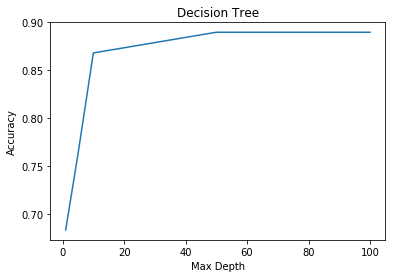

50


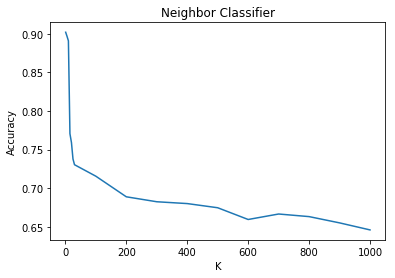

1


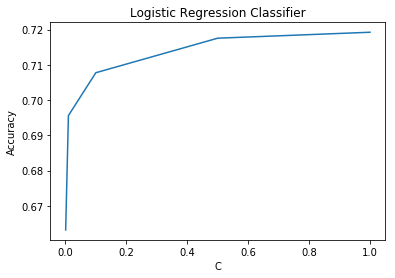

1


In [24]:
Y = final['WIN']
X = final.drop('WIN',axis=1)

import numpy as np 
from sklearn import tree
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import linear_model 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline

maxdepths = [1,5,10,50,100]
accuracy = []
for param in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=param)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())

plt.plot(maxdepths, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.show()

best1 = 0
for i in accuracy:
    if i >= best1:
        best1 = i 
depth1 = maxdepths[accuracy.index(best1)]
print(depth1)

Ks = [1, 5, 10, 15, 20, 25, 30]
accuracyK = []
for k in Ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracyK.append(scores.mean())

Ks = [1, 5, 10, 15, 20, 25, 30,100,200,300,400,500,600,700,800,900,1000]
accuracyK = []
for k in Ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracyK.append(scores.mean())

plt.plot(Ks, accuracyK)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Neighbor Classifier')
plt.show()

best2 = 0
for i in accuracyK:
    if i >= best2:
        best2 = i
depth2 = Ks[accuracyK.index(best2)]
print(depth2)

maxdepths = [0.001, 0.01, 0.1, 0.5, 1]
accuracy = []
for c in maxdepths:
    clf = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())

plt.plot(maxdepths, accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Classifier')
plt.show()

best3 = 0
for i in accuracy:
    if i >= best3:
        best3 = i 
depth3 = maxdepths[accuracy.index(best3)]

print(depth3)

In [25]:
from sklearn.metrics import accuracy_score

Y_test = Test['WIN']
X_test = Test.drop('WIN',axis=1)

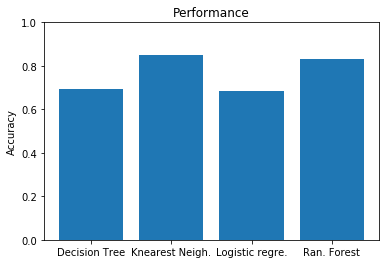

[0.695, 0.85, 0.685, 0.83]

In [26]:
sc=[]
clf = tree.DecisionTreeClassifier(max_depth=depth1)
clf.fit(X, Y)
Y_predTest1 = clf.predict(X_test)
sc.append(accuracy_score(Y_test, Y_predTest1))

clf = KNeighborsClassifier(n_neighbors=depth2)
clf.fit(X, Y)
Y_predTest2 = clf.predict(X_test)
sc.append(accuracy_score(Y_test, Y_predTest2))

clf = linear_model.LogisticRegression(C=depth3)
clf.fit(X, Y)
Y_predTest3 = clf.predict(X_test)
sc.append(accuracy_score(Y_test, Y_predTest3))


from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=1, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X,Y)
# Actual class predictions
Y_predTest4 = model.predict(X_test)
sc.append(accuracy_score(Y_test, Y_predTest4))


objects = ('Decision Tree','Knearest Neigh.', 'Logistic regre.', 'Ran. Forest')
y_pos = np.arange(len(objects))

plt.bar(y_pos, sc)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Performance')
plt.ylim(0,1)

plt.show()

sc

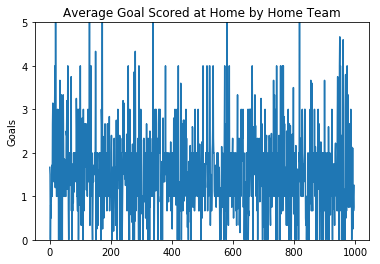

In [27]:
#goals_home={}
#goals_away={}
#goals_home_goal_diff = {}
#goals_away_goal_diff = {}
goals_home_lt= []
goals_away_lt=[]
goals_home_goal_diff_lt = []
goals_away_goal_diff_lt = []
for i in goals_home:
    goals_home_lt.append(np.mean(goals_home[i]))

x = [i for i in range(len(goals_home_lt))]
plt.plot(goals_home_lt)
plt.xlabel('')
plt.ylabel('Goals')
plt.title('Average Goal Scored at Home by Home Team')
plt.ylim(0,5)
plt.show()


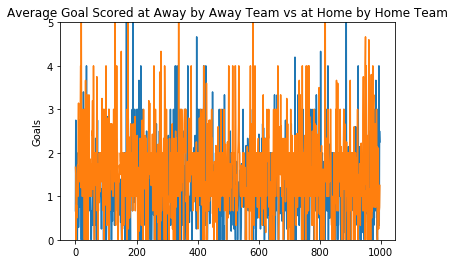

Avg Goal at Home by Home Team: 1.551287893246811
Avg Goal at Away by Away Team: 1.217267471450838


In [30]:
#goals_home_goal_diff = {}
#goals_away_goal_diff = {}
goals_away_lt=[]
goals_home_goal_diff_lt = []
goals_away_goal_diff_lt = []
for i in goals_away:
    goals_away_lt.append(np.mean(goals_away[i]))

x = [i for i in range(len(goals_away_lt))]
plt.plot(goals_away_lt)
plt.plot(goals_home_lt)
plt.xlabel('')
plt.ylabel('Goals')
plt.title('Average Goal Scored at Away by Away Team vs at Home by Home Team')
plt.ylim(0,5)
plt.show()
print('Avg Goal at Home by Home Team: '+str(np.mean(goals_home_lt)))
print('Avg Goal at Away by Away Team: '+str(np.mean(goals_away_lt)))

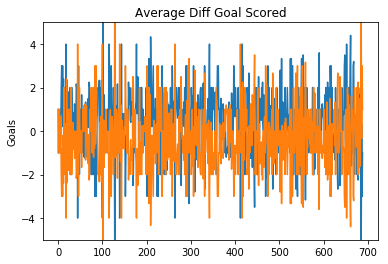

Avg Goal diff at Home by Home Team: 0.34216255442670535
Avg Goal diff at Away by Away Team: -0.34216255442670535


In [343]:
#goals_home_goal_diff = {}
#goals_away_goal_diff = {}
goals_home_goal_diff_lt = []
goals_away_goal_diff_lt = []
for i in goals_home_goal_diff:
    goals_home_goal_diff_lt.append(np.mean(goals_home_goal_diff[i]))
for i in goals_away_goal_diff:
    goals_away_goal_diff_lt.append(-1*np.mean(goals_away_goal_diff[i]))

x = [i for i in range(len(goals_home_goal_diff_lt))]
plt.plot(goals_home_goal_diff_lt)
plt.plot((goals_away_goal_diff_lt))
plt.xlabel('')
plt.ylabel('Goals')
plt.title('Average Diff Goal Scored')
plt.ylim(-5,5)
plt.show()
print('Avg Goal diff at Home by Home Team: '+str(np.mean(goals_home_goal_diff_lt)))
print('Avg Goal diff at Away by Away Team: '+str(np.mean(goals_away_goal_diff_lt)))